<a href="https://colab.research.google.com/github/dtoralg/INESDI_Data-Science_ML_IA/blob/main/%5B03%5D%20-%20Modelos%20Supervisados%20Alternativos/Supervisados_Alternativos_Ejercicio_2_knn_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervisados Alternativos - Ejercicio 2: knn_breast_cancer.ipynb

Este notebook es **We do**: mezcla de celdas resueltas y `# TODO` guiados.



## Objetivos

- Cargar y explorar el dataset Breast Cancer.
- Aplicar escalado y preparar pipeline para KNN.
- Evaluar rendimiento y analizar matriz de confusión.
- Probar distintos `k` y estrategias de weighting.

## Descripción del dataset

Dataset Breast Cancer (Wisconsin) provisto por `sklearn.datasets.load_breast_cancer()`.
Contiene 569 muestras y 30 variables numéricas (características de imágenes de tumores). Target binario: 0 = malignant, 1 = benign.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             precision_score, recall_score, f1_score)
from sklearn.decomposition import PCA
np.random.seed(42)

### 1) Carga de datos (resuelta)

In [ ]:
# Cargar dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
target_names = data.target_names

print('Dimensiones:', X.shape)
display(X.head())
print('\nClases (target):', dict(enumerate(target_names)))
print('\nDistribución por clase:')
display(y.value_counts())

Dimensiones: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Clases (target): {0: np.str_('malignant'), 1: np.str_('benign')}

Distribución por clase:


,count
target,
1,357
0,212


### 2) Exploración rápida (TODOs)

In [ ]:
# TODO: Revisa tipos y estadísticas básicas
# - Usa X.info(), X.describe().T
# - Comprueba correlaciones y posibles colinealidades con X.corr()
# TODO

### 3) Preprocesado: escalado

KNN está basado en distancias. Escalamos con StandardScaler antes de entrenar.

In [ ]:
# TODO: aplica el StandardScaler a las variables de X y muestra el resultado

### 4) División train/test (resuelto)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print('Train:', X_train.shape, 'Test:', X_test.shape)
display(y_train.value_counts(normalize=True).round(3))
display(y_test.value_counts(normalize=True).round(3))

Train: (455, 30) Test: (114, 30)


,proportion
target,
1,0.626
0,0.374


,proportion
target,
1,0.632
0,0.368


### 5) Baseline: KNN con k=5 (resuelto)

Accuracy (k=5): 0.9649122807017544

Classification report:

              precision    recall  f1-score   support

   malignant       0.97      0.93      0.95        42
      benign       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



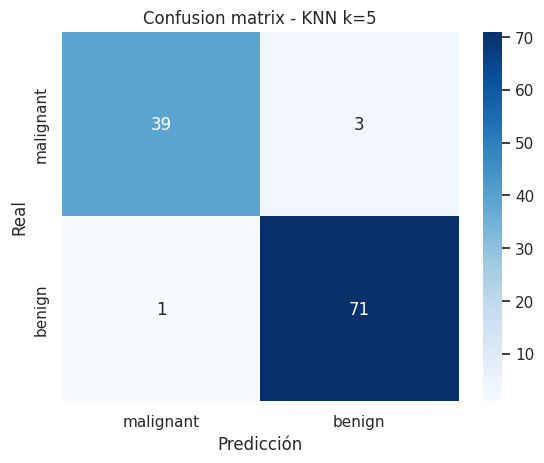

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy (k=5):', accuracy_score(y_test, y_pred))
print('\nClassification report:\n')
print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion matrix - KNN k=5')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

### 6) Probar distintos `k` y `weights` (TODO)

Elige varios `k` manualmente (por ejemplo [1,3,5,7,9,11]) y prueba `weights='uniform'` y `weights='distance'`. Evalúa accuracy en test.

In [ ]:
# TODO: Rellena para probar diferentes k y weights
# results = []
# TODO

### 8) Análisis de errores y ejemplos mal clasificados (TODO)

Muestra ejemplos concretos mal clasificados y revisa sus características: ¿son outliers? ¿tienen medidas extremas?

In [ ]:
# TODO: Encuentra índices de test mal clasificados y muestra sus filas originales (sin escala)
# Ejemplo:
# mis_idx = X_test.index[y_test != y_pred]
# X.loc[mis_idx].head()
# TODO

### 9) Reflexión clínica (TODO)

En problemas médicos minimizar falsos negativos (no detectar un cáncer maligno) suele ser prioritario. Evalúa recall/precision para la clase positiva y propone ajustes (cambiar umbral, `weights='distance'`, recalibrar).

In [ ]:
# TODO: Calcula precision, recall y f1 por clase e interpreta especialmente el recall de la clase 'malignant' (0)
# from sklearn.metrics import precision_score, recall_score
# TODO

### 10) Conclusión y siguientes pasos

- Has visto un pipeline KNN aplicado a un problema clínico real con mix de celdas resueltas y `# TODO`.
- Próximos pasos: probar distintos `k` y `weights`, comparar con SVM en el mismo dataset, y optimizar trade-offs clínicos.
